**MEJORAS:** 


* Se mejora la sección de conclusiones
* La sección de referencias se citan de acuerdo al formato IEEE

# Introducción

En este reporte se analizan los diferentes órdenes de crecimiento, siendo desde $O(1)$ hasta $O(n^n)$, para ello se presentan primero las gráficas correspondientes para visualizar como es el comportamiento de cada una y observar qué tan rápido crecen.

Una vez que se han observado los comportamientos se procederá a comprobar los órdenes de crecimiento mediante algoritmos de prueba, dichos algoritmos se escogieron de acuerdo a las complejidades mencionadas en la primera parte, y son algoritmos clásicos que van de algoritmos de ordenamiento, cálculo del número de Fibonacci hasta una implementación por fuerza bruta del problema del viajero (Travelling Salesman Problem). Para realizar las mediciones de rendimiento se hacen a partir de las herramientas que ofrece el paquete BenchmarkTools, siendo el parámetro de rendimiento n, que tomará valores de 100, 1000, 10000,100000 y un valor muy grande de n=1000000. Todas las implementaciones se realizan en Julia.

En las pruebas de medición de tiempo se irá observando que no es posible hacer algunas mediciones para algunos órdenes de crecimiento debido a su naturaleza por lo que para esos casos se hará una estimación teórica suponiendo que cada operación tiene un costo de 1ns. 

El contenido del reporte se organiza de la siguiente forma

1. Órdenes de creciemiento, se describen con gráficas los comportamientos de los crecimientos
2. Tiempos de ejecución, se experimenta con los diferentes valores de n para cada algoritmo
3. Resultados, se presentan los tiempos medidos de cada algoritmo
4. Algoritmos, se muestran las implementaciones de los algoritmos usados en este reporte
5. Referencias



# Órdenes de crecimiento

## $O(1)$ vs $O(log(n))$

In [35]:
using Plots, LaTeXStrings

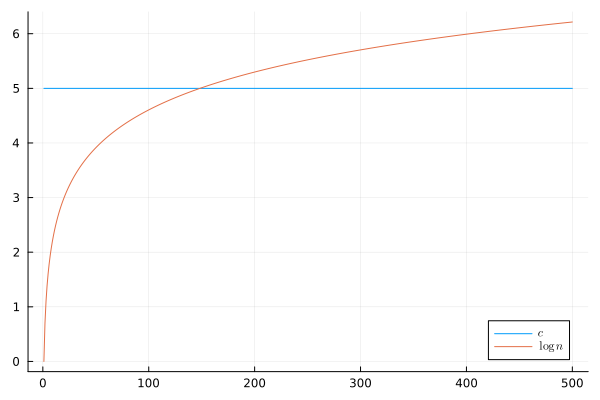

In [138]:
n = 500 
plot(1:n, [5 for x in 1:n], label=L"c")
plot!(1:n, [log(x) for x in 1:n], label=L"\log{n}")

Se observa que la función de crecimiento para $O(log(n))$ es muy pequeña es decir, incluso después de 500 puntos sus valores en $y$ no superan a 7, por lo que funciones de crecimiento de este tipo son ideales para un algoritmo, por supuesto el $O(1)$ es constante y hallar algoritmos que tengan ese comportamiento solo es posible si es amortizado.

## $O(n)$ vs $O(n log (n))$

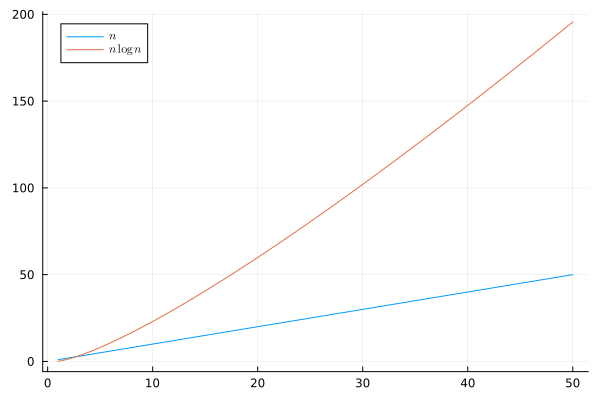

In [37]:
n=50
plot(1:n, [x for x in 1:n], label=L"n")
plot!(1:n, [x*log(x) for x in 1:n], label=L"n\log{n}")

En el caso del orden de crecimiento $O(nlog(n))$ se ve que tiene un crecimiento rápido, ya que al observar el crecimiento lineal de $O(n)$, lo supera dentro de los 10 primeros puntos.

## $O(n²)$ vs $O(n³)$

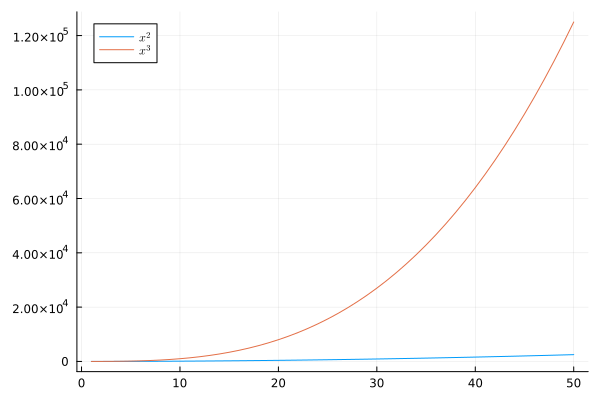

In [82]:
n=50
plot(1:n, [x*x for x in 1:n ], label=L"x^2")
plot!(1:n, [x*x*x for x in 1:n], label=L"x^3")

Dada la naturaleza de las funciones que son polinomiales se observa que la función que llega al orden de $10^5$ es $x^3$ en los primeros 50 puntos, mientras que $x^2$ llega apenas a 2500.

## $O(a^n)$ vs $O(n!)$

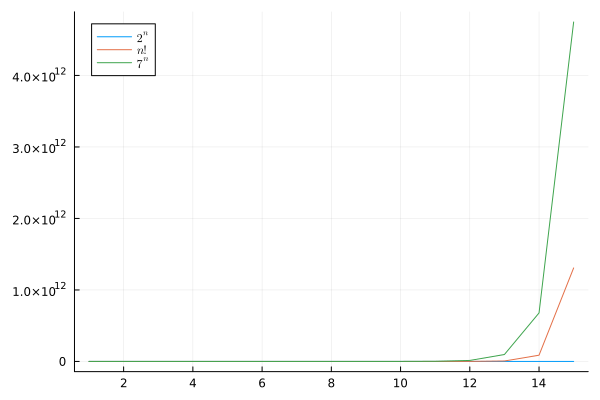

In [89]:
n=15
plot(1:n, [2^x for x in 1:n ], label=L"2^n")
plot!(1:n, [factorial(x) for x in 1:n], label=L"n!")
plot!(1:n, [7^x for x in 1:n ], label=L"7^n")

Para este caso se detecta un comportamiento relevante, ya que la función de crecimiento $O(a^n)$ al depender del valor de $a$ puede tener un crecimiento menor o uno mucho mayor, como en la gráfica que para un valor de $a=2$ en 15 puntos llega al orden de $3x10^4$ mientras que cuando $a=7$ supera por mucho incluso al orden de crecimiento de $O(n!)$ llegando ambas a tener un orden $10^{12}$. 

Sin embargo aunque $O(a^n)$ sea un poco menor para ciertos valores de $a$ tiene un crecimiento muy rápido y lo es mucho mas para $O(n!)$, siendo estos órdenes de crecimiento no aptos para algoritmos.

## $O(n!)$ vs $O(n^n)$

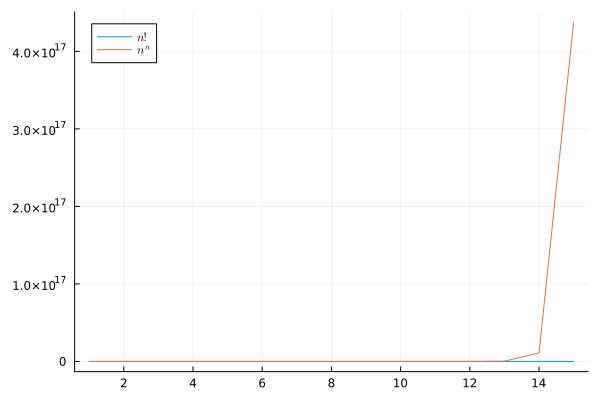

In [90]:
n=15
plot(1:n, [factorial(x) for x in 1:n], label=L"n!")
plot!(1:n, [x^x for x in 1:n ], label=L"n^n")

Ahora en estos órdenes de crecimiento, nos damos cuenta que hay incluso un crecimiento "peor" que el de $O(n!)$ siendo $O(n^n)$ que llega en tan solo 15 puntos al orden de $10^{17}$ por lo que son órdenes de crecimiento que hay que evitar a toda costa.

Después de observar las anteriores comparaciones de órdenes de crecimiento podemos listarlas del menor a mayor como sigue:
1. $O(log(n))$ 
2. $O(n)$ 
3. $O(nlog(n))$ 
4. $O(x^2)$ 
5. $O(x^3)$ 
6. $O(a^n)$ 
7. $O(n!)$
8. $O(n^n)$

Siendo las primeras 4 las que se deben considerar para la realización de los algoritmos que requieran iteraciones sobre gran cantidad de datos

# Tiempos de ejecución

Para hacer las mediciones de rendimiento se estará usando BenchmarkTools, en la que de acuerdo a la documentación [¹](#Referencias) se hará uso de la función tune!() para obtener mejores mediciones de rendimiento, ya que con benchmark se ejecuta varias veces el código para obtener estadísticas de tiempos con lo que para no estar calculando cuántas deben ser las ejecuciones apropiadas para cada algoritmo, tune! lo hace por nosotros.

Dicho lo anterior se estarán mostrando los resultados de tiempos en este orden n=100,1000,10000, 100000 y 1000000 para cada algoritmo, sin embargo a partir de los algoritmos de crecimiento $O(a^n)$ no se estarán tomando mediciones ya que dichos algoritmos toman demasiado tiempo en ejecutarse incluso para una $n=15$ por lo que se omiten en esta sección y se retoman en la sección de Resultados.

En la medición de tiempos de ejecución de este reporte se decidió generar números random del 1 al 100, de forma que todas las entradas que requería algún arreglo o matriz se generaron con ese rango de números, esto con la finalidad de no saturar la memoria con los números almacenados y así dar margen para probar con tamaños de $n$ grandes.

También se hace notar que para cada benchmark se utiliza un setup en el que permite pasar los parámetros a la función pero sin que sea tomado en cuenta su tiempo de ejecución de los mismos, permitiendo así una medición de tiempo más real del algoritmo. Para ver cómo están configurados los parámetros es necesario revisar la sección de Algoritmos para mayores detalles de implementación. 

In [3]:
using BenchmarkTools

## n = 100

Se estarán tomando mediciones para una $n=100$

In [22]:
n=100

100

### Complejidad constante

$O(1)$

In [26]:
#O(1)
b = @benchmarkable arreglo(A, $n) setup=(A=rand(1:100, $n))
tune!(b)
run(b)    

BenchmarkTools.Trial: 10000 samples with 997 evaluations per sample.
 Range (min … max):  19.786 ns … 77.631 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     21.679 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   22.525 ns ±  4.842 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▇▂█▄▃▄▄▂                                                   ▂
  ▅█████████▅▄▃▄▄▁▃▁▃▁▁▁▁▁▃▅▅▇▇▇▇▇▆▆▆▇▆▇▇▆▆▆▅▆▄▅▃▄▄▁▁▁▃▃▁▄▃▃▄ █
  19.8 ns      Histogram: log(frequency) by time      51.3 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad Logarítmica 

$O(log(n))$

In [46]:
b_a1= @benchmarkable nth_fibonacci($n)
tune!(b_a1)
run(b_a1)

BenchmarkTools.Trial: 10000 samples with 206 evaluations per sample.
 Range (min … max):  364.150 ns … 68.945 μs  ┊ GC (min … max):  0.00% … 98.45%
 Time  (median):     405.993 ns              ┊ GC (median):     0.00%
 Time  (mean ± σ):   584.455 ns ±  1.567 μs  ┊ GC (mean ± σ):  17.64% ±  6.89%

  ▆█▅▄▄▄▃▃▃▂▂▂▂▂▂▃▂▁                                           ▂
  ███████████████████▇▇▇▇▆▆▄▅▆▅▄▆▇▅▃▄▄▅▄▄▁▁▄▁▁▁▁▃▃▃▁▁▃▁▃▁▁▃▁▁▃ █
  364 ns        Histogram: log(frequency) by time      1.99 μs <

 Memory estimate: 800 bytes, allocs estimate: 15.

### Complejidad Lineal 

$O(n)$

In [47]:
#O(n)
b = @benchmarkable bubbleSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 10000 samples with 6 evaluations per sample.
 Range (min … max):  6.576 μs … 26.665 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     7.238 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.970 μs ±  2.022 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▂▂▄█▆▄▂▂▂▁          ▁▁▁▁▁                ▁                 ▁
  ██████████▇▄▄▄▂▅▆▆▇██████▇▇▆▆▆▅▅▅▅▆▆▇▇▇▇███▇▇▆▅▄▄▄▄▄▅▃▄▄▅▆ █
  6.58 μs      Histogram: log(frequency) by time     16.8 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad de la forma 

$O(nlog(n))$

In [49]:
#O(nlog(n))
b = @benchmarkable mergeSort(A, 1, l) setup=(A=rand(1:100,$n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 10000 samples with 3 evaluations per sample.
 Range (min … max):   9.604 μs …  12.717 ms  ┊ GC (min … max):  0.00% … 99.82%
 Time  (median):     11.591 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   18.434 μs ± 157.209 μs  ┊ GC (mean ± σ):  13.96% ±  1.73%

  ▆█▆▄▄▁     ▁▁▂▁▂▂▃▄▅▅▄▅▄▃▂▂▁▁                                ▂
  ██████▇▆▆▇████████████████████▇█████▇▇▇▆▇▇▇▇▇▇█▆▇▇▆▆▅▄▆▆▆▆▆▅ █
  9.6 μs        Histogram: log(frequency) by time      40.7 μs <

 Memory estimate: 18.75 KiB, allocs estimate: 396.

### Complejidad cuadrática 

$O(n^2)$

In [52]:
#O(n^2)
b = @benchmarkable insertionSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 10000 samples with 282 evaluations per sample.
 Range (min … max):  270.965 ns … 908.078 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     306.266 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   332.829 ns ±  65.926 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▅▄  █▆▄▄▂▂▁▂▁▁▁▁▂▁▂▂▁       ▁ ▁▂▁▁▁          ▁              ▂
  ▅▁███▅██████████████████▇▇▇▇██████████▇▇▇██▇█████▇█▇▆▇▆▆▆▆▆█▇ █
  271 ns        Histogram: log(frequency) by time        587 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad cúbica

$O(n^3)$

In [53]:
#O(n^3)
b = @benchmarkable multiplicarMatrizCuadrada(A, B, C, $n) setup=(A=rand(1:100, $n, $n); B=rand(1:100, $n, $n); C=zeros($n,$n))
tune!(b)
run(b)

BenchmarkTools.Trial: 1575 samples with 1 evaluation per sample.
 Range (min … max):  2.575 ms …   3.777 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     2.961 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.022 ms ± 229.229 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

               █▇▂▃▅▆▁▁▁       ▁                               
  ▃▁▂▂▂▂▃▂▂▇▇▆██████████▇▇▇▅▇▅▆██▇▇▇▅▅▃▅▃▅▄▃▄▅▃▄▃▃▄▃▃▂▃▃▂▂▁▂▂ ▃
  2.57 ms         Histogram: frequency by time        3.61 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

## n=1000

Se realizan mediciones para una $n=1000$

In [10]:
n=1000

1000

### Complejidad 

$O(1)$

In [11]:
b = @benchmarkable arreglo(A, $n) setup=(A=rand(1:100, $n))
tune!(b)
run(b)    

BenchmarkTools.Trial: 10000 samples with 995 evaluations per sample.
 Range (min … max):  26.479 ns …  1.395 μs  ┊ GC (min … max): 0.00% … 96.14%
 Time  (median):     27.557 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   30.581 ns ± 26.194 ns  ┊ GC (mean ± σ):  1.94% ±  2.31%

  ▆█▃▄▆▄▄▂▂▁▃ ▂▄▃▂                                            ▂
  ███████████▇█████▆▅▅▆▇▆▇▆▆▇▇▇▇▇██▇▆▇▇▆▆▆▅▄▄▄▄▅▃▄▄▃▁▅▁▄▅▆▆▆▅ █
  26.5 ns      Histogram: log(frequency) by time      62.5 ns <

 Memory estimate: 16 bytes, allocs estimate: 1.

### Complejidad Logarítmica

$O(log(n))$

In [55]:
b_b1= @benchmarkable nth_fibonacci($n)
tune!(b_b1)
run(b_b1)

BenchmarkTools.Trial: 10000 samples with 183 evaluations per sample.
 Range (min … max):  553.246 ns … 168.682 μs  ┊ GC (min … max):  0.00% … 99.40%
 Time  (median):     618.475 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):   889.257 ns ±   2.566 μs  ┊ GC (mean ± σ):  16.52% ±  7.19%

  ▆▆█▅▄▄▄▃▂▂▃▂▂▁▁▁▂▁▁▁▁▁  ▁▁▂▂▂▂▁                               ▂
  ████████████████████████████████▇▇▇▆▆▇▆▆▆▆▆▆▄▅▅▆▆▄▄▅▅▅▄▃▄▃▄▄▄ █
  553 ns        Histogram: log(frequency) by time       1.99 μs <

 Memory estimate: 1.12 KiB, allocs estimate: 22.

### Complejidad Lineal

$O(n)$

In [57]:
#O(n)
b = @benchmarkable bubbleSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 5697 samples with 1 evaluation per sample.
 Range (min … max):  730.345 μs …   1.816 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     834.130 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   868.080 μs ± 106.995 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▃▄▂▁▁▁▄█▇▅▄▃▃▃▃▄▄▅▄▃▃▂▃▃▂▃▃▃▃▂▂▂▂▁▁▁  ▁▁▁▁▁▁▁ ▁▁              ▂
  █████████████████████████████████████████████████████▇▇▇▇▇▆▇▆ █
  730 μs        Histogram: log(frequency) by time        1.2 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad de la forma

$O(nlog(n))$

In [58]:
#O(nlog(n))
b = @benchmarkable mergeSort(A, 1, l) setup=(A=rand(1:100,$n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  140.520 μs …  37.476 ms  ┊ GC (min … max):  0.00% … 99.27%
 Time  (median):     157.913 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   206.285 μs ± 577.194 μs  ┊ GC (mean ± σ):  12.37% ±  5.51%

  ▄▂▆█▆▄▄▄▃▃▂▂▂▂▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▂▃▂▂▁                          ▂
  █████████████████████████████████████▇▇▇▆▆▆▆▆▆▆▆▅▆▆▇▆▆▆▅▄▅▅▄▅ █
  141 μs        Histogram: log(frequency) by time        369 μs <

 Memory estimate: 212.06 KiB, allocs estimate: 3998.

### Complejidad cuadrática 

$O(n^2)$

In [59]:
#O(n^2)
b = @benchmarkable insertionSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 10000 samples with 9 evaluations per sample.
 Range (min … max):  19.682 μs … 79.475 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     22.661 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   24.715 μs ±  4.389 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

        ▂██▁                                                   
  ▁▁▃▄▄▅████▅▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  19.7 μs         Histogram: frequency by time        39.4 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad cúbica

$O(n^3)$

In [60]:
#O(n^3)
b = @benchmarkable multiplicarMatrizCuadrada(A, B, C, $n) setup=(A=rand(1:100, $n, $n); B=rand(1:100, $n, $n); C=zeros($n,$n))
tune!(b)
run(b)

BenchmarkTools.Trial: 2 samples with 1 evaluation per sample.
 Range (min … max):  3.555 s …   3.577 s  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.566 s              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.566 s ± 15.101 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █                                                       █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  3.56 s         Histogram: frequency by time        3.58 s <

 Memory estimate: 0 bytes, allocs estimate: 0.

## n=10000

Se realizan mediciones para una n=10000

In [43]:
n=10000

10000

### Complejidad

$O(1)$

In [13]:
b = @benchmarkable arreglo(A, $n) setup=(A=rand(1:100, $n))
tune!(b)
run(b)    

BenchmarkTools.Trial: 10000 samples with 995 evaluations per sample.
 Range (min … max):  26.711 ns …  1.183 μs  ┊ GC (min … max): 0.00% … 95.53%
 Time  (median):     28.929 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   30.966 ns ± 16.718 ns  ┊ GC (mean ± σ):  0.36% ±  0.96%

  ▆█▃▆█▄▃▃▁▂              ▁ ▁ ▁  ▁▁▁                          ▂
  ██████████▅▇▅▃▄▃▃▃▁▅▆▆▇███████████▇▇▆▅▅▆▅▄▄▃▅▄▄▆▆▇▆▇▇▆▆▇█▇▇ █
  26.7 ns      Histogram: log(frequency) by time      66.1 ns <

 Memory estimate: 16 bytes, allocs estimate: 1.

### Complejidad Logarítmica 

$O(log(n))$

In [63]:
b_d1= @benchmarkable nth_fibonacci($n)
tune!(b_d1)
run(b_d1)

BenchmarkTools.Trial: 10000 samples with 125 evaluations per sample.
 Range (min … max):  728.360 ns … 117.842 μs  ┊ GC (min … max):  0.00% … 98.38%
 Time  (median):     806.660 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.135 μs ±   2.898 μs  ┊ GC (mean ± σ):  17.58% ±  7.40%

  ▅▄█▆▄▃▃▃▄▃▂▁▁▂▂▂▁▁   ▁▁▁          ▁▂▁                         ▁
  ███████████████████████████████▇▇█████▇▇▇▆▆▅▄▄▄▄▅▅▄▃▄▄▄▄▄▄▅▅▅ █
  728 ns        Histogram: log(frequency) by time       2.24 μs <

 Memory estimate: 1.56 KiB, allocs estimate: 30.

### Complejidad Lineal

$O(n)$

In [64]:
#O(n)
b = @benchmarkable bubbleSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 36 samples with 1 evaluation per sample.
 Range (min … max):  134.409 ms … 144.647 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     138.906 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   139.210 ms ±   2.350 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

                    ▃ ▃   ▃█ ▃     █  ▃                          
  ▇▁▁▁▁▁▁▇▇▇▇▁▁▁▁▇▇▁█▁█▁▇▁██▇█▇▁▁▇▁█▁▇█▁▇▁▁▁▇▇▁▇▇▁▁▁▁▇▁▁▁▁▁▇▁▁▇ ▁
  134 ms           Histogram: frequency by time          145 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad de la forma

$O(nlog(n))$

In [65]:
#O(nlog(n))
b = @benchmarkable mergeSort(A, 1, l) setup=(A=rand(1:100,$n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 2191 samples with 1 evaluation per sample.
 Range (min … max):  1.580 ms … 35.997 ms  ┊ GC (min … max):  0.00% … 93.95%
 Time  (median):     1.848 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):   2.218 ms ±  1.460 ms  ┊ GC (mean ± σ):  13.31% ± 16.38%

  ▄██▇▆▄▄▃▂                                                  ▁
  ██████████▆▇██▇▆▆▆▄▅▅▄▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▄▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▆ █
  1.58 ms      Histogram: log(frequency) by time     7.25 ms <

 Memory estimate: 2.36 MiB, allocs estimate: 40058.

### Complejidad cuadrática 

$O(n^2)$

In [66]:
#O(n^2)
b = @benchmarkable insertionSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 273 samples with 1 evaluation per sample.
 Range (min … max):  17.434 ms …  21.153 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     18.253 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   18.282 ms ± 444.754 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

            ▁ ▁▅▂ ▁▆ ▂ ▂▂▄ ▆▂▄█    ▁▁                           
  ▃▃▁▃▁▆▇▆▄▇█▆███▇████▆█████████▅▇▄██▆██▄▅▄▆▄▁▅▄▄▅▃▃▅▄▁▃▃▁▃▁▁▃ ▄
  17.4 ms         Histogram: frequency by time         19.4 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad cúbica 

$O(n^3)$

Después de esperar casi 11 hrs la macro de becnhmark `@benchmarkatable` no terminaba de ejecutarse por lo que se decide interrumpir el proceso debido a que hay mas mediciones por hacer y satura al equipo, sin embargo se atribuye el excesivo tiempo al tamaño que ocupa en memoria las matrices, por lo que se decide hacer la medición con la macro `@btime` si bien no da detalles de un benchmark como tal sí permite hacer una medición.

In [44]:
#O(n^3)
# b = @benchmarkable multiplicarMatrizCuadrada(A, B, C, $n) setup=(A=rand(1:100, $n, $n); B=rand(1:100, $n, $n); C=zeros($n,$n))
# tune!(b)
# run(b)
@btime multiplicarMatrizCuadrada(A, B, C, $n) setup=(A=rand(1:100, $n, $n); B=rand(1:100, $n, $n); C=zeros($n,$n))

  8381.900 s (0 allocations: 0 bytes)


10000×10000 Matrix{Float64}:
 2.53644e7  2.55968e7  2.56392e7  …  2.53993e7  2.53571e7  2.55172e7
 2.49243e7  2.49894e7  2.53936e7     2.4937e7   2.5236e7   2.51181e7
 2.52609e7  2.51615e7  2.55934e7     2.51123e7  2.55196e7  2.54645e7
 2.5217e7   2.51582e7  2.5622e7      2.53258e7  2.54949e7  2.54967e7
 2.55491e7  2.55584e7  2.59572e7     2.56744e7  2.56278e7  2.57165e7
 2.53885e7  2.52386e7  2.57849e7  …  2.54075e7  2.54256e7  2.54179e7
 2.52657e7  2.53559e7  2.5656e7      2.52605e7  2.54743e7  2.57675e7
 2.51652e7  2.5091e7   2.52621e7     2.50126e7  2.5153e7   2.52732e7
 2.53764e7  2.49914e7  2.54897e7     2.50505e7  2.53589e7  2.55941e7
 2.49897e7  2.51552e7  2.55396e7     2.51342e7  2.53261e7  2.52791e7
 2.51448e7  2.52288e7  2.56172e7  …  2.51957e7  2.55074e7  2.54755e7
 2.55693e7  2.56076e7  2.58849e7     2.56087e7  2.57213e7  2.5963e7
 2.51065e7  2.51694e7  2.5491e7      2.50881e7  2.53625e7  2.5289e7
 ⋮                                ⋱                        
 2.53312e7  2.52

## n=100000
Se realizan mediciones para una n=100000

In [1]:
n=100000

100000

### Complejidad

$O(1)$

In [15]:
b = @benchmarkable arreglo(A, $n) setup=(A=rand(1:100, $n))
tune!(b)
run(b)    

BenchmarkTools.Trial: 10000 samples with 995 evaluations per sample.
 Range (min … max):  26.902 ns … 100.877 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     27.740 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   29.086 ns ±   4.995 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▅█▄▃▃▆▂▃ ▁▁                                                  ▁
  ███████████▇▆▆▅▄▁▄▁▃▁▁▁▃▁▄▅▆▅▆▇▇▇▇▇▆▆▇▇▇▆▆▅▅▅▅▄▄▃▁▃▄▃▄▄▃▄▄▁▃ █
  26.9 ns       Histogram: log(frequency) by time      57.7 ns <

 Memory estimate: 16 bytes, allocs estimate: 1.

### Complejidad logarítmica 

$O(log(n))$

In [80]:
b_d1= @benchmarkable nth_fibonacci($n)
tune!(b_d1)
run(b_d1)

BenchmarkTools.Trial: 10000 samples with 45 evaluations per sample.
 Range (min … max):  867.889 ns … 291.502 μs  ┊ GC (min … max):  0.00% … 99.23%
 Time  (median):     905.511 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.176 μs ±   4.199 μs  ┊ GC (mean ± σ):  14.69% ±  4.79%

  ▃█▆▃▅▃▂▁ ▁                                   ▂▂▁              ▁
  ███████████▇▇▇▅▇▇█▇█▆▇▇▇▆▆▅▅▅▄▅▃▁▄▄▅▄▅▆▆▅▆▇▆▇███▇███▆▅▁▅▄▅▅▃▄ █
  868 ns        Histogram: log(frequency) by time       2.12 μs <

 Memory estimate: 1.89 KiB, allocs estimate: 36.

### Complejidad Lineal

$O(n)$

Para este caso notamos que benchmark solo puede hacer una evaluación y una muestra por lo que ya tienen un orden de crecimiento costoso para este tamaño de problema.

In [38]:
#O(n)
b = @benchmarkable bubbleSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 1 sample with 1 evaluation per sample.
 Single result which took 20.060 s (0.00% GC) to evaluate,
 with a memory estimate of 0 bytes, over 0 allocations.

### Complejidad de la forma

$O(nlog(n))$

In [41]:
#O(nlog(n))
b = @benchmarkable mergeSort(A, 1, l) setup=(A=rand(1:100,$n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 203 samples with 1 evaluation per sample.
 Range (min … max):  19.625 ms … 42.809 ms  ┊ GC (min … max):  0.00% … 28.86%
 Time  (median):     24.919 ms              ┊ GC (median):    16.48%
 Time  (mean ± σ):   24.016 ms ±  3.330 ms  ┊ GC (mean ± σ):  13.04% ±  9.84%

    █▃▂               ▃▁▇▃▄                                    
  ▄▆███▄▆▄▃▃▁▁▃▃▁▁▃▃▃▇█████▆▆▆▃▃▃▃▁▃▃▁▁▃▃▁▁▁▃▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▃ ▃
  19.6 ms         Histogram: frequency by time        34.7 ms <

 Memory estimate: 26.06 MiB, allocs estimate: 400506.

### Complejidad cuadrática 

$O(n^2)$

In [42]:
#O(n^2)
b = @benchmarkable insertionSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 3 samples with 1 evaluation per sample.
 Range (min … max):  1.810 s …  1.827 s  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.815 s             ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.818 s ± 8.756 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █               █                                      █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.81 s        Histogram: frequency by time        1.83 s <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Complejidad cúbica 

$O(n^3)$

Para este caso no hay forma de encontrar la medición ya que al ejecutarlo nos arroja un mensaje de error "OutOfMemoryError" indicando que es muy grande los paramentros para la función, por lo que en este caso se queda sin una medición experimental

## n=1000000

Finalmente llegamos al valor de n demasiado grande, de este se espera poder recabar datos hasta la complejiddad $O(nlog(n))$ ya que las demás son muy grandes para el tamaño del problema. Se omiten los intentos para $O(n^3)$ ya que hay errores de memoria.

Para determinar el tamaño de la n asintóticamente grande se intentaron las mediciones para las complejidades de $O(1)$, $O(n)$ y $O(nlog(n))$ con un tamaño de problema $n=100000000$, sin embargo al ejecutarlas el kernel de jupyter se reniciaba, haciendo imposible la medición, algo que era esperado, aunque no para esas complejidades que no tienen un crecimiento tan rápido, pero es más probable que sea debido a que el tamaño de problema es muy grande como para pasar un arreglo de ese tamaño. Por lo que se decide trabajar con una $n=1000000$.

In [48]:
n=1000000

1000000

### Complejidad 

$O(1)$

In [9]:
b = @benchmarkable arreglo(A, $n) setup=(A=rand(1:100, $n))
tune!(b)
run(b)    

BenchmarkTools.Trial: 781 samples with 994 evaluations per sample.
 Range (min … max):  28.326 ns … 87.603 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     31.597 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   32.297 ns ±  5.363 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▇▆  ▆█▁                                                     
  ███▅████▆▆▅▄▃▃▂▂▁▁▂▁▁▁▁▁▂▂▁▂▂▁▁▂▂▂▂▁▁▂▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁▁▂▁▁▂▁ ▃
  28.3 ns         Histogram: frequency by time        62.8 ns <

 Memory estimate: 16 bytes, allocs estimate: 1.

### Complejidad logarítmica 

$O(log(n))$

In [21]:
b_a1= @benchmarkable nth_fibonacci($n)
tune!(b_a1)
run(b_a1)

BenchmarkTools.Trial: 10000 samples with 10 evaluations per sample.
 Range (min … max):  1.040 μs …  1.099 ms  ┊ GC (min … max): 0.00% … 99.64%
 Time  (median):     1.135 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.554 μs ± 11.330 μs  ┊ GC (mean ± σ):  8.81% ±  1.40%

  █▇▇▄▃▅▁              ▂▃ ▃▄▃▃▃▄▃▁▂▂▁                        ▂
  ███████▇▅▆▇▄▅▅▄▄▄▄▄▃▄██▇████████████▇▇▇▇▇▆▆▇▇▄▄▄▄▄▄▄▃▁▄▅▃▄ █
  1.04 μs      Histogram: log(frequency) by time      3.6 μs <

 Memory estimate: 2.22 KiB, allocs estimate: 42.

### Complejidad Lineal 

$O(n)$

Para este caso, se decide usar nuevamente la macro `@btime` para obtener una medición ya que con `@benchmark` no terminaba su ejecución después de 3 hrs.

In [47]:
# O(n)
# b = @benchmarkable bubbleSort(A,l) setup=(A=rand(1:100, $n); l=length(A))
# tune!(b)
# run(b)
@btime bubbleSort(A,l) setup=(A=rand(1:100, $n); l=length(A))

  1789.982 s (0 allocations: 0 bytes)


### Complejidad de la forma 

$O(nlog(n))$

In [42]:
#O(nlog(n))
b = @benchmarkable mergeSort(A, 1, l) setup=(A=rand(1:100,$n); l=length(A))
tune!(b)
run(b)

BenchmarkTools.Trial: 18 samples with 1 evaluation per sample.
 Range (min … max):  226.607 ms … 446.703 ms  ┊ GC (min … max):  4.23% … 52.54%
 Time  (median):     244.459 ms               ┊ GC (median):    11.67%
 Time  (mean ± σ):   287.597 ms ±  85.210 ms  ┊ GC (mean ± σ):  24.34% ± 17.82%

      █                                                          
  ▄▁▄▁█▄█▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▆▄ ▁
  227 ms           Histogram: frequency by time          447 ms <

 Memory estimate: 283.98 MiB, allocs estimate: 4004090.

### Complejidad cuadrática 

$O(n^2)$

Para este caso, directamente se realizó la medición con `@btime`

In [51]:
#O(n^2)
@btime insertionSort(A,l) setup=(A=rand(1:100, $n); l=length(A))

  168.925 s (0 allocations: 0 bytes)


# Resultados

## Tiempos experimentales

Con los algoritmos implementados se pudieron obtener mediciones para casi todos los tamaños de problema, sin embargo se tuvieron que usar diferentes formas de medición para $O(n^3)$ para $n=10000$, $O(n)$ y $O(n^2)$ para $n=1000000$ acudiendo a la macro de `@btime`. 

Las medidas reflejadas en la tabla son los datos tomados de la mediana del benchamark, a excepción de los medidos con `@btime`.

Con los algoritmos escogidos notamos que solo para $n=100$ tuvieron el comportamiento esperado de acuerdo al orden de crecimiento del mejor caso, sin embargo a partir de $n=1000$ notamos que el algoritmo de bubble sort tomo más tiempo incluso que el de insertion sort.

| Complejidad | Algoritmo | $n=100$ | $n=1000$ | $n=10000$ | $n=100000$ | $n=1000000$ |
|-----------|-------------|-----------|-----------|-----------|-----------|-----------|
| $O(1)$      | Acceder a un arreglo   | 21.463 ns  | 27.557 ns  | 28.929 ns  | 27.740 ns  | 31.597 ns |
| $O(log(n))$ | Números de Fibonacci | 405.993 ns | 618.475 ns | 806.660 ns | 905.511 ns | 1.135 us  |
| $O(n)$      | Bubble Sort     | 7.238 us   | 834.130 us | 138.906 ms | 20.060 s   | 1789.982 s        |
| $O(nlog(n))$| Merge Sort| 11.591 us  | 157.913 us | 1.848 ms   | 24.919 ms  | 244.459 ms|
| $O(n^2)$    | Insertion Sort | 306.266 ns | 22.661 us  | 18.253 ms  | 1.815 s    | 168.925 s       |
| $O(n^3)$    | Multiplicación de matrices | 2.961 ms   | 3.566 s    | 8381.9 s   | N/A        | N/A       |


## Tiempos teóricos

Para tener una idea de cuánto tiempo habrian tomado los algoritmos de crecimiento más grande se refleja a continuación una estimación suponiendo que cada operación tiene un costo de 1 ns, aunque para simplificar el cálculo se toma en cuenta una sola operación para cada algoritmo con ese costo para sustituirlo en las funciones $f_1(n)=2^n$, $f_2(n)=n!$ y $f_3(n)=n^n$, las cuales corresponden a los órdenes de crecimiento presentados en la tabla, para los diferentes valores de n.

| Complejidad | Algoritmo | $n=100$ | $n=1000$ | $n=10000$ | $n=100000$ | $n=1000000$ |
|-----------|-------------|-----------|-----------|-----------|-----------|-----------|
| $O(a^n)$    | Fibonacci Recursivo | 1.2676 E+30 ns | 1.2676 E+301 ns | $\infty$ | $\infty$| $\infty$|
| $O(n!)$    | TSP | 9.332621544 E+157 ns |  4.0238726 E+2567 ns | $\infty$ | $\infty$  |   $\infty$  |
| $O(n^n)$    | Caminos en un grafo | 1 E+200 ns|   $\infty$   |  $\infty$  |  $\infty$  |  $\infty$  |


Como podemos notar incluso para un valor de n no tan grande como $n=100$ tienen tiempos demasiado grandes tan grandes que para n = 10000 ya es inimagible el tiempo que tardarían. Aunque las cantidades están expresadas en ns, no es difícil ver que siguen siendo tiempo muy enormes si queremos pasarlo a horas.

# Conclusiones

En este trabajo para poder abordar los diferentes órdenes de crecimiento se escogieron algoritmos que tuvieran el crecimiento de las gráficas presentadas al principio, dado que las complejidades con crecimiento exponencial y factorial tienen un costo computacional muy alto, no fue posible generar experimentos ni con $n=100$ provocando que quedaran fuera de todas nuestras métricas, siendo que se tuvieron que dar aproximaciones teóricas para esos algoritmos encontrando valores excesivos y por ende imposibles de computar. Sin embargo aunque dichos algoritmos con esas complejidas no son usados, son útiles para entender la lógica de la implementación que se debe mejorar para conseguir los objetivos que busca el algoritmo. Se encontró una forma útil de hacer mediciones de tiempo a través de la biblioteca de julia `BenchmarkTools` para poder generar mediciones confiables, la cual seguirá siendo usada para todas las prácticas.
Con esto nos quedamos que cualquier algoritmo que se use para grandes cantidades de datos hay que buscar las complejidades de menor crecimiento siendo $O(log(n))$ y $O(nlog(n))$ lo cual es todo un área de investigación dado que no es algo sencillo.


# Algoritmos implementados

La elección de algoritmos de ordenamiento se hizo de acuerdo a la tabla "Sorting Algorithms Cheat Sheet" [²](#Referencias) en la que se escogieron los tiempos de complejidad de acuerdo al mejor caso, para su implementación se agrega en cada uno la referencia respectiva. En el caso del algoritmo de complejidad $O(log(n))$ así como el de $O(n!)$ se obtuvieron de este [sitio web](https://www.geeksforgeeks.org). Y para el algoritmo de complejidad $O(n^3)$ se obtuvo del Cormen [³](#Referencias)

Antes de probar los algoritmos con los valores de $n$ del reporte, se validaron que tuvieran el comportamiento adecuado para datos pequeños es decir para una $n=10$

Hay que hacer notar que la implementación de estos algoritmos se hizo de forma que tuvieran el menor número de inicializaciones de variables dentro de la función ya que para hacer una medición más precisa del algoritmo en sí, es bueno tener esas precauciones como incluso lo menciona el manual de BenchmarkTools[¹](#Referencias)

Se muestran a continuación los algoritmos usados en orden de menor a mayor complejidad.

## Acceder a un arreglo

$O(1)$


Se revisa la tabla de "Data Structure Operations Cheat Sheet" [²](#Referencias) y se observa que el arrreglo tiene complejidad $O(1)$ por lo que se hace un programa muy sencillo para poder acceder a uno de sus datos

In [8]:
function arreglo(A,n)
    return A[n]
end    

# A=rand(1:100, 100)
# arreglo(A, length(A))

arreglo (generic function with 1 method)

## Cálculo de los números de fibonacci

$O(log(n))$

La implementación del algoritmo de fibonacci con matriz de exponenciación se realiza a partir del código encontrado en "Geeks for geeks" [⁴](#Referencias) por lo que se hizo la traducción del ese código en python a julia.

In [5]:
function multiply(mat1, mat2)
    x = mat1[1,1] * mat2[1,1] + mat1[1,2] * mat2[2,1]
    y = mat1[1,1] * mat2[1,2] + mat1[1,2] * mat2[2,2]
    z = mat1[2,1] * mat2[1,1] + mat1[2,2] * mat2[2,1]
    w = mat1[2,1] * mat2[1,2] + mat1[2,2] * mat2[2,2]

    mat1[1,1], mat1[1,2] = x, y
    mat1[2,1], mat1[2,2] = z, w

end    

    
# Function to perform matrix exponentiation
function matrix_power(mat1, n)
  
    # Base case for recursion
    if n == 0
        return 1
    elseif n == 1
        return 1
    end   
    
    # Initialize a helper matrix
    mat2 = [1 1 ;1 0]

    # Recursively calculate mat1^(n // 2)
    matrix_power(mat1, div(n,2))

    # Square the matrix mat1
    multiply(mat1, mat1)

    # If n is odd, multiply by the helper matrix mat2
    if n % 2 != 0
        multiply(mat1, mat2)
    end    
end
# Function to calculate the nth Fibonacci number
function nth_fibonacci(n)
    if n <= 1
        return n
    end
    # Initialize the transformation matrix
    mat1 = [1 1 ;1 0]

    # Raise the matrix mat1 to the power of (n - 1)
    matrix_power(mat1, n - 1)

    # The result is in the top-left cell of the matrix
    return mat1[1,1]
end
# nth_fibonacci(1000)

nth_fibonacci (generic function with 1 method)

## Bubble Sort

$O(n)$

Se implementa el algoritmo Bubble Sort de acuerdo al pseudocódigo encontrado en Cormen [³](#Referencias) y se hace una ligera modificación para los arreglos que no sean impares.


In [12]:
function bubbleSort(A,n)
    for i in 1:(n -1)
        for j in 1:n-i
            if A[j] > A[j+1]
                A[j], A[j+1] = A[j+1], A[j]
            end
        end
    end        
end

# A=[5, 2, 4,7,1,3,2,6]
# A=rand(1:10, 100)
# bubbleSort(A, length(A))
# A

bubbleSort (generic function with 1 method)

## Merge Sort

$O(nlog(n))$

Para esta complejidad se implementa Merge Sort de acuerdo a lo encontrado en Cormen [³](#Referencias)

In [16]:
function merge(A,p,q,r)
    n1 = q-p+1
    n2 = r-q
    L=zeros(n1+1)
    R=zeros(n2+1)
    for i in 1:n1
        L[i]=A[p+i-1]
    end
    for j in 1:n2
        R[j] = A[q+j]
    end
    L[n1+1]= Inf
    R[n2+1]= Inf
    
    i=1
    j=1
    for k in p:r
        if L[i] <= R[j]
            A[k] = L[i]
            i=i+1
        else 
            A[k] = R[j]
            j=j+1
        end
    end    
end    

function mergeSort(A,p,r)
    if p < r
        q = div(p+r,2)
        mergeSort(A,p,q)
        mergeSort(A,q+1,r)
        merge(A,p,q,r)
    end    
    
end     
# A=[5, 2, 4,7,1,3,2,6]
# A=rand(1:10,100)
# mergeSort(A, 1, length(A))
# A

mergeSort (generic function with 1 method)

## Insertion Sort 

$O(n^2)$

Se implementa el algoritmo de  Insertion Sort de acuerdo a Cormen [³](#Referencias)

In [50]:
function insertionSort(A, tam)
    for j in 2:tam
        key = A[j]
        i = j-1
        while i > 0 && A[i]>key
            A[i+1] = A[i]
            i = i-1
        end
        A[i+1] = key
    end
end    
# A=[5,2,4,7,1,3,2,6]
# A=rand(1:10, 100)
# insertionSort(A, length(A))
# A

insertionSort (generic function with 1 method)

## Multiplicación de matrices

$O(n^3)$

Se implementa la multiplicación de matrices cuadradas de acuerdo a Cormen [³](#Referencias)

In [28]:
using Random
function multiplicarMatrizCuadrada(A, B, C, n)
    # C = zeros(n,n)
    for i in 1:n
        for j in 1:n
            C[i,j] = 0
            for k in 1:n
                C[i,j] +=A[i,k]*B[k,j]
            end    
        end   
    end    
   return C
end   
# n=100
# Random.seed!(4) #checar este random
# A = rand(1:9, n, n)
# B = rand(1:9, n, n)
# C = zeros(n,n)
# multiplicarMatrizCuadrada(A,B,C,n)
# @time 
# @benchmark multiplicarMatrizCuadrada(3)


multiplicarMatrizCuadrada (generic function with 1 method)

## Cálculo de los números de fibonacci (Recursivo)

$O(a^n)$

Para esta implementación se utiliza el código de Fibonacci encontrado en github [⁵](#Referencias)


In [24]:
function fibonacci(n)
  if n <= 1 return 1 end
  return fibonacci(n - 1) + fibonacci(n - 2)
end



fibonacci (generic function with 1 method)

## Travelling Salesman Problem

$O(n!)$

Se decide implementar el algoritmo encontrado en "Geeks for geeks" [⁶](#Referencias) y se hace la traducción al lenguaje de julia


In [58]:
using Combinatorics

function tsp(cost::Matrix{Int})
    # Número de nodos
    numNodes = size(cost, 1)
    nodes = 2:numNodes

    minCost = Inf

    # Generar todas las permutaciones de los nodos restantes
    for perm in permutations(nodes)
        currCost = 0
        currNode = 1

        # Calcular el costo de la permutación actual
        for node in perm
            currCost += cost[currNode, node]
            currNode = node
        end

        # Agregar el costo para regresar al nodo de inicio
        currCost += cost[currNode, 1]

        # Actualizar el costo mínimo si el costo actual es menor
        minCost = min(minCost, currCost)
    end

    return minCost
end

function generate_cost_matrix(n::Int)
    # Crear una matriz de costos vacía
    cost_matrix = zeros(Int, n, n)

    # Llenar la matriz de costos
    for i in 1:n
        for j in 1:n
            if i != j
                # Generar un costo aleatorio entre 1 y 100
                cost_matrix[i, j] = rand(1:100)
            end
        end
    end

    return cost_matrix
end
# Ejemplo de uso
# cost = [
#     [0 10 15 20];
#     [10 0 35 25];
#     [15 35 0 30];
#     [20 25 30 0]
# ]
# cost = generate_cost_matrix(10)
# res = tsp(cost)
# println(res)

@benchmark tsp(cost) setup=(cost=generate_cost_matrix(1))

BenchmarkTools.Trial: 10000 samples with 985 evaluations per sample.
 Range (min … max):   53.750 ns … 91.323 μs  ┊ GC (min … max):  0.00% … 99.81%
 Time  (median):     116.584 ns              ┊ GC (median):     0.00%
 Time  (mean ± σ):   132.335 ns ±  1.248 μs  ┊ GC (mean ± σ):  15.74% ±  1.73%

  ▇▃▂▂▁                ▇█▆▆▅▄▂▂▂▁▁ ▁▁▂▁▁                       ▂
  █████▇█▇▄▄▃▁▆▅▃▁▁▄▃▄█████████████████████████▇▇████▇▇▇▇▆▆▆▇▇ █
  53.8 ns       Histogram: log(frequency) by time       223 ns <

 Memory estimate: 128 bytes, allocs estimate: 4.

## Caminos completos en un grafo

$O(n^n)$

Se implementó una función para generar todos los caminos de un grafo completo, por lo que solo se probo para n=3 sin embargo no se sugiere probar para n=15 o aproximadas a, ya que como vimos en los tiempos teóricos, es muy grande (Por supuesto al intentar esa ejecución en mi equipo se quedo trabada en ese proceso y se tuvo que hacer un hard reset, no lo hagan en casa)

In [ ]:
function generate_all_paths(n)
    nodes = 1:n
    all_paths = []

    function helper(current_path)
        if length(current_path) == n
            push!(all_paths, copy(current_path))
        else
            for node in nodes
                if node ∉ current_path
                    push!(current_path, node)
                    helper(current_path)
                    pop!(current_path)
                end
            end
        end
    end

    helper([])
    return all_paths
end

# Ejemplo de uso
#n = 15
# paths = generate_all_paths(n)
# for path in paths
#     println(path)
# end
#@benchmark generate_all_paths($n)

# Referencias

Aquí están las referencias en formato IEEE:  

[1] **BenchmarkTools.jl**, *Benchmarking basics*. [Online]. Available: [https://juliaci.github.io/BenchmarkTools.jl/dev/manual/#Benchmarking-basics](https://juliaci.github.io/BenchmarkTools.jl/dev/manual/#Benchmarking-basics)  

[2] N. Karumanchi, *Data Structures and Algorithms Made Easy in Java*. CareerMonk Publications, 2011.  

[3] T. H. Cormen, C. E. Leiserson, R. L. Rivest, and C. Stein, *Introduction to Algorithms*. MIT Press, 2022, pp. 18–40.  

[4] *Program for Nth Fibonacci Number*. [Online]. Available: [https://www.geeksforgeeks.org/program-for-nth-fibonacci-number/](https://www.geeksforgeeks.org/program-for-nth-fibonacci-number/)  

[5] *Fib*. [Online]. Available: [https://github.com/drujensen/fib](https://github.com/drujensen/fib)  

[6] *Traveling Salesman Problem (TSP) Implementation*. [Online]. Available: [https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/](https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/)  
